en este código hacemos:
1.- generamos un conjunto de datos con dependencias condicionales
2.- aprendemos la estructura de los datos (generamos un DAG) usando causal learn

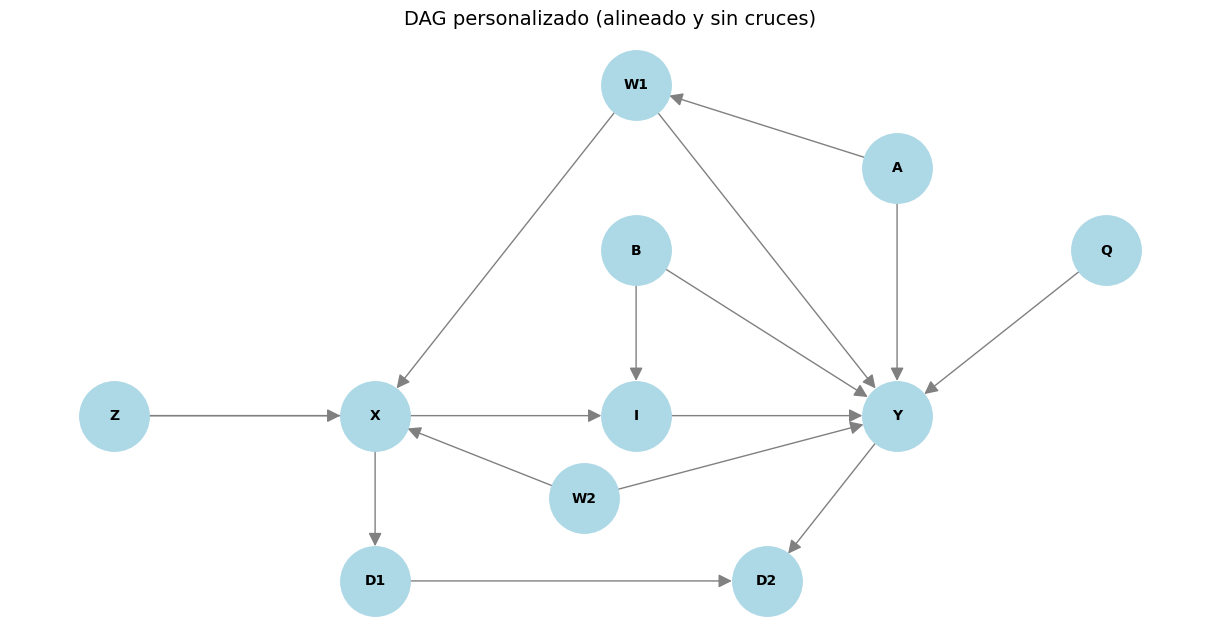

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Crear el DAG según las relaciones especificadas
edges = [
    ("Z", "X"),
    ("Z", "I"),
    ("I", "Y"),
    ("X", "D1"),
    ("D1", "D2"),
    ("Y", "D2"),
    ("B", "I"),
    ("B", "Y"),
    ("Q", "Y"),
    ("A", "Y"),
    ("A", "W1"),
    ("W1", "X"),
    ("W1", "Y"),
    ("W2", "X"),
    ("W2", "Y")
]

G = nx.DiGraph()
G.add_edges_from(edges)

# 2. Definir posiciones manuales para evitar cruces y alinear nodos clave
pos = {
    "Z":  (0, 0),
    "X":  (1, 0),
    "I":  (2, 0),
    "Y":  (3, 0),
    "D1": (1, -1),
    "D2": (2.5, -1),

    "B":  (2, 1),
    "Q":  (3.8, 1),
    "A":  (3, 1.5),
    "W1": (2, 2),
    "W2": (1.8, -0.5)
}

# Ajustar automáticamente nodos que no tienen posición definida (por si acaso)
for node in G.nodes():
    if node not in pos:
        pos[node] = (0, 0)

# 3. Dibujar el DAG con formato personalizado
plt.figure(figsize=(12, 6))
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=2500,
    font_size=10,
    arrows=True,
    arrowsize=20,
    edge_color='gray',
    font_weight='bold'
)
plt.title("DAG", fontsize=14)
plt.axis("off")
plt.show()


In [ ]:

# 3. Generar datos sintéticos coherentes con el DAG
np.random.seed(42)
n = 5000
data = pd.DataFrame()

# Variables exógenas primero (sin padres)
data["Z1"] = np.random.binomial(1, 0.5, n)
data["B"] = np.random.normal(0, 1, n)
data["Q"] = np.random.normal(0, 1, n)
data["A"] = np.random.normal(0, 1, n)
data["W2"] = np.random.binomial(1, 0.5, n)

# Variables con dependencias
data["Z"] = 1.5 * data["Z1"] + np.random.normal(0, 1, n)
data["W1"] = 0.7 * data["A"] + np.random.normal(0, 1, n)
data["X"] = 0.8 * data["W1"] + 0.6 * data["W2"] + np.random.normal(0, 1, n)
data["I"] = 0.6 * data["Z"] + 0.8 * data["B"] + np.random.normal(0, 1, n)
data["D1"] = 0.7 * data["X"] + np.random.normal(0, 1, n)
data["Y"] = (
    1.2 * data["I"]
    + 0.5 * data["B"]
    + 0.3 * data["Q"]
    + 0.6 * data["A"]
    + 0.9 * data["W1"]
    + 0.7 * data["W2"]
    + np.random.normal(0, 1, n)
)
data["D2_continuous"] = 0.8 * data["D1"] + 0.6 * data["Y"] + np.random.normal(0, 1, n)
data["D2"] = (data["D2_continuous"] > data["D2_continuous"].mean()).astype(int)
data.drop(columns=["D2_continuous"], inplace=True)

# Verifica estructura final
print("Variables en el dataset:", data.columns.tolist())
print(data.head())
